<a href="https://colab.research.google.com/github/liadekel/analyzing-big-data/blob/master/HW_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Assignment  6

In [2]:
!pip install turicreate
!pip install kaggle 
!pip install gensim
!pip install pyLDAvis
!pip install spaCy
!pip install afinn

     |████████████████████████████████| 91.8MB 60kB/s 
     |████████████████████████████████| 86.3MB 63kB/s 
     |████████████████████████████████| 327kB 46.8MB/s 
     |████████████████████████████████| 3.4MB 30.3MB/s 
     |████████████████████████████████| 450kB 41.2MB/s 
     |████████████████████████████████| 3.8MB 47.1MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp36-none-any.whl size=320850 sha256=585d02088b110b5a52b3013ab4b16747d0d5e2ff156c4baeb8406e9540465c5f
  Stored in directory: /root/.cache/pip/wheels/ff/4f/ed/2e6c676c23efe5394bb40ade50662e90eb46e29b48324c5f9b
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=98b8e26095f517cab88b8e1cb92f7d90793dfda90e591a372267b525dd323aa3
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built resampy gast
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
 

In [3]:
#setting up Kaggle & TuriCreate package s
import json
import os

!mkdir /root/.kaggle/
# Installing the Kaggle package

#Important Note: complete this with your own key - after running this for the first time remmember to **remove** your API_KEY
# api_token = 

# creating kaggle.json file with the personal API-Key details 
# You can also put this file on your Google Drive

with open('/root/.kaggle/kaggle.json', 'w') as file:
  json.dump(api_token, file)
!chmod 600 /root/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle/’: File exists


**Question 1:** Construct a sentiment classifier using 80% of the reviews in the [Amazon Fine Food Reviews dataset](https://www.kaggle.com/snap/amazon-fine-food-reviews).
The classifier needs to predict if a product got a one-star or a five-star review. 
Evaluate the classifier using the rest of the data (30pt). 


In [4]:
!mkdir ./datasets
!mkdir ./datasets/amazon

# download the dataset from Kaggle and unzip it
!kaggle datasets download snap/amazon-fine-food-reviews -p ./datasets/amazon
!unzip ./datasets/amazon/*.zip  -d ./datasets/amazon/
! ls -l ./datasets/amazon/

 97% 234M/242M [00:02<00:00, 114MB/s] 
100% 242M/242M [00:02<00:00, 92.9MB/s]
Archive:  ./datasets/amazon/amazon-fine-food-reviews.zip
  inflating: ./datasets/amazon/Reviews.csv  
  inflating: ./datasets/amazon/database.sqlite  
  inflating: ./datasets/amazon/hashes.txt  
total 905848
-rw-r--r-- 1 root root 253873708 May 12 17:25 amazon-fine-food-reviews.zip
-rw-r--r-- 1 root root 372798464 Sep 19  2019 database.sqlite
-rw-r--r-- 1 root root       277 Sep 19  2019 hashes.txt
-rw-r--r-- 1 root root 300904694 Sep 19  2019 Reviews.csv


In [5]:
import turicreate as tc

sf = tc.SFrame.read_csv("./datasets/amazon/Reviews.csv")

Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: ummm can s ... mmended!.,

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: Very dry,  ... rumbly :",
	9: to the poi ... is."
88623

3 lines failed to parse correctly

Finished parsing file /content/datasets/amazon/Reviews.csv

Parsing completed. Parsed 100 lines in 1.0695 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,str,str,int,int,int,int,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Unexpected characters after last column. "B000GW46D4"
Parse failed at token ending at: 
	myself that tastes much better than this."
35360,B000GW46D4,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 35359
	1: B000GW46D4
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
35360

Unexpected characters after last column. "one of only a very few"
Parse failed at token ending at: 
	hile. This is a very rare hot sauce, one of only a very few,^ where the actual chile is the major ingredient.
Successfully parsed 10 tokens: 
	0: 74275
	1: B005B3HKPO
	2: A3OC6M21K4UAQ
	3: tw
	4: 2
	5: 5
	6: 2
	7: 1328486400
	8: whats with ... is smell??
	9: "ummm can  ...  hot sauce

Unexpected characters after last column. "B000PMJLJO"
Parse failed at token ending at: 
	myself that tastes much better than this."
88623,B000PMJLJO,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 88622
	1: B000PMJLJO
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... is."
88623

Unexpected characters after last column. "but that awful after taste has no place in my afternoons.  Fog Chaser is flavorful but smooth. If you have had difficulty finding a good coffee for the new machines"
Parse failed at token ending at: 
	e had difficulty finding a good coffee for the new machines,^ do give this one a try."
181216,B007Y59HVM,#oc-
Successfully parsed 10 tokens: 
	0: 181213
	1: B007Y59HVM
	2: #oc-R3W5DW4JKJT228
	3: Mamaw
	4: 0
	5: 2
	6: 1
	7: 1346112000
	8: Disappointed
	9: "I regret  ... he morning

Read 71440 lines. Lines per second: 53461.3

Unexpected characters after last column. "0"
Parse failed at token ending at: 
	 />\"
190510,B0012UEHFQ,A2788LGTSGCFA6,"Mom of 3 ""sue""",0,^0,5,1329436800,She Loves Them!,I have a crazy do
Successfully parsed 10 tokens: 
	0: 190509
	1: B0012UEHFQ
	2: A3CR0UBHFX0NE7
	3: Sharee Lee Peterson
	4: 0
	5: 0
	6: 1
	7: 1330300800
	8: Poor Substitute
	9: I had prev ... of 3 "sue"

Unexpected characters after last column. "B000GW46DE"
Parse failed at token ending at: 
	yself that tastes much better than this."
201283,B000GW46DE,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 201282
	1: B000GW46DE
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
201283

Unexpected characters after last column. "B000PMC7GI"
Parse failed at token ending at: 
	yself that tastes much better than this."
353089,B000PMC7GI,^A1DPWQR4WSPXTM,Japri,0,0,2,1331424000,Very unsat
Successfully parsed 10 tokens: 
	0: 353088
	1: B000PMC7GI
	2: A2Y4S4CNGKF21S
	3: H. Swanson
	4: 0
	5: 0
	6: 2
	7: 1332374400
	8: "Very dry, ... edibly dry
	9: to the poi ... s."
353089

Unexpected characters after last column. "give it a try.  After drinking half of a bottle"
Parse failed at token ending at: 
	ou haven't, give it a try.  After drinking half of a bottle,^ you will know it's good stuff."
434576,B001SB1B
Successfully parsed 10 tokens: 
	0: 434574
	1: B002DHMX3A
	2: A2XNJJ9TF70P4J
	3: Angie
	4: 1
	5: 1
	6: 1
	7: 1307232000
	8: How did th ... s this up?
	9: "The cerea ... ou haven't

8 lines failed to parse correctly

Finished parsing file /content/datasets/amazon/Reviews.csv

Parsing completed. Parsed 260995 lines in 3.54898 secs.

In [6]:
# remove reviews with scores different from 1 or 5
sf = sf[(sf['Score'] == 5) | (sf['Score'] == 1)]
# convert to sentiments
def label2sentiment(label):
    if label == 5:
        return "Positive"
    else:
        return "Negative"

sf['sentiment'] = sf['Score'].apply(lambda label: label2sentiment(label))
sf

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5
11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5
12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5
13,B0009XLVG0,A327PCT23YH90,LT,1,1,1


In [0]:
# calculate 1-ngrams and 2-ngrams
sf['words_1grams'] = tc.text_analytics.count_ngrams(sf['Summary'], n=1, method='word')
sf['words_2grams'] = tc.text_analytics.count_ngrams(sf['Summary'], n=2, method='word')

In [8]:
train, test = sf.random_split(0.8)
cls = tc.classifier.create(train,features=['words_1grams', 'words_2grams'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.

PROGRESS: The following methods are available for this type of problem.
PROGRESS: LogisticClassifier, SVMClassifier
PROGRESS: The returned model will be chosen according to validation accuracy.


Logistic regression:

--------------------------------------------------------

Number of examples          : 145057

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 134102

Number of coefficients      : 134103

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 1.221100     | 0.931496          | 0.911853            |

| 1         | 4        | 1.000000  | 1.517395     | 0.981304          | 0.949050            |

| 2         | 5        | 1.000000  | 1.709871     | 0.990742          | 0.956385            |

| 3         | 6        | 1.000000  | 1.902717     | 0.993885          | 0.957564            |

| 4         | 7        | 1.000000  | 2.099950     | 0.994533          | 0.958481            |

| 9         | 12       | 1.000000  | 3.094312     | 0.996257          | 0.959790            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

SVM:

--------------------------------------------------------

Number of examples          : 145057

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 134102

Number of coefficients    : 134103

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 2        | 1.000000  | 0.254859     | 0.931496          | 0.911853            |

| 1         | 4        | 1.000000  | 0.531709     | 0.974245          | 0.943680            |

| 2         | 5        | 1.000000  | 0.714250     | 0.989473          | 0.955206            |

| 3         | 6        | 1.000000  | 0.896533     | 0.992610          | 0.957957            |

| 4         | 7        | 1.000000  | 1.073153     | 0.993837          | 0.958481            |

| 9         | 12       | 1.000000  | 1.951110     | 0.995643          | 0.959136            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

PROGRESS: Model selection based on validation accuracy:
PROGRESS: ---------------------------------------------
PROGRESS: LogisticClassifier              : 0.9597904387688277
PROGRESS: SVMClassifier                   : 0.9591355599214145
PROGRESS: ---------------------------------------------
PROGRESS: Selecting LogisticClassifier based on validation set performance.


In [0]:
ev = cls.evaluate(test)

**Question 2:** Construct a sentiment classifier using features from the [TextBlob package](https://textblob.readthedocs.io/en/dev/index.html),
    and from the [affin package](https://pypi.org/project/afinn/). Compare the two classifiers results and visualize it (however you want) (20pt)

In [0]:
train_affin, test_affin = sf.random_split(0.8)
train_affin['words_1grams'] = train_affin['words_1grams'].dict_trim_by_keys(tc.text_analytics.stop_words(), True)
test_affin['words_1grams'] = test_affin['words_1grams'].dict_trim_by_keys(tc.text_analytics.stop_words(), True)

In [11]:
from afinn import Afinn
afinn = Afinn()

train_affin['afinn_score'] = train_affin['Summary'].apply(lambda t: afinn.score(t))
test_affin['afinn_score'] = test_affin['Summary'].apply(lambda t: afinn.score(t))
train_affin

Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score
1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5
2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1
5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M.Wassir"" ...",0,0,5
8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5
10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5
11,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,1,1,5
12,B0009XLVG0,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",4,4,5
13,B0009XLVG0,A327PCT23YH90,LT,1,1,1
15,B001GVISJM,A2MUGFV2TDQ47K,"Lynrie ""Oh HELL no""",4,5,5
16,B001GVISJM,A1CZX3CP8IKQIJ,Brian A. Lee,4,5,5


In [12]:
#Please notice that this train/test set are different from the above train and test sets
cls_affin = tc.boosted_trees_classifier.create(train_affin,features=['afinn_score', 'words_1grams', 'words_2grams'], target="sentiment")

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 145128

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 133153

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.219786     | 0.914103          | 0.914387            | 0.510434          | 0.510347            |

| 2         | 0.456596     | 0.917411          | 0.917659            | 0.410917          | 0.411034            |

| 3         | 0.670668     | 0.918775          | 0.918968            | 0.348934          | 0.348955            |

| 4         | 0.888351     | 0.916798          | 0.915565            | 0.308352          | 0.308860            |

| 5         | 1.107089     | 0.917032          | 0.915958            | 0.281796          | 0.282392            |

| 10        | 2.130585     | 0.919705          | 0.918445            | 0.228457          | 0.229671            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [0]:
ev_affin = cls_affin.evaluate(test_affin)

In [14]:
ev

{'accuracy': 0.9614558785022257,
 'auc': 0.965885372421008,
 'confusion_matrix': Columns:
 	target_label	str
 	predicted_label	str
 	count	int
 
 Rows: 4
 
 Data:
 +--------------+-----------------+-------+
 | target_label | predicted_label | count |
 +--------------+-----------------+-------+
 |   Negative   |     Positive    |  870  |
 |   Positive   |     Negative    |  602  |
 |   Negative   |     Negative    |  3804 |
 |   Positive   |     Positive    | 32914 |
 +--------------+-----------------+-------+
 [4 rows x 3 columns],
 'f1_score': 0.9781277860326896,
 'log_loss': 0.16567049187358013,
 'precision': 0.9742481648117453,
 'recall': 0.9820384294068505,
 'roc_curve': Columns:
 	threshold	float
 	fpr	float
 	tpr	float
 	p	int
 	n	int
 
 Rows: 100001
 
 Data:
 +-----------+--------------------+--------------------+-------+------+
 | threshold |        fpr         |        tpr         |   p   |  n   |
 +-----------+--------------------+--------------------+-------+------+
 |    0.

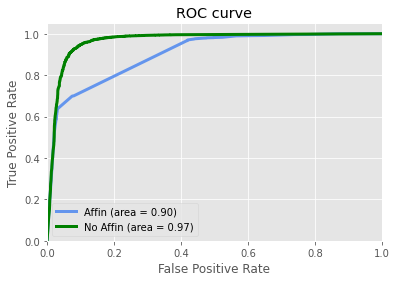

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# we will compare the two classifiers by their roc curve.
# as we already saw from the eval report, the classifer *without* affin yielded 
# better score.
plt.style.use('ggplot')
plt.plot(ev_affin['roc_curve']['fpr'],
         ev_affin['roc_curve']['tpr'],
         color ='cornflowerblue',
         label='Affin (area = %0.2f)' %ev_affin['auc'], linewidth=3)
plt.plot(ev['roc_curve']['fpr'],
         ev['roc_curve']['tpr'],
         color='green',
         label='No Affin (area = %0.2f)' %ev['auc'],linewidth=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC curve')
plt.show()

**Question 3:**  Select a different reviews dataset and create a sentiment classifier which utilizes word embeddings (25pt).
Evaluate this classifier (5pt). Try to improve your classifier by adding additional features (20pt)

In [3]:
!mkdir ./datasets/hotels

# download the dataset from Kaggle and unzip it
!kaggle datasets download datafiniti/hotel-reviews -p ./datasets/hotels
!unzip ./datasets/hotels/*.zip  -d ./datasets/hotels
! ls -l ./datasets/hotels

  0% 0.00/13.1M [00:00<?, ?B/s]
100% 13.1M/13.1M [00:00<00:00, 121MB/s]
Archive:  ./datasets/hotels/hotel-reviews.zip
  inflating: ./datasets/hotels/7282_1.csv  
  inflating: ./datasets/hotels/Datafiniti_Hotel_Reviews.csv  
  inflating: ./datasets/hotels/Datafiniti_Hotel_Reviews_Jun19.csv  
total 199488
-rw-r--r-- 1 root root  16548391 Sep 20  2019 7282_1.csv
-rw-r--r-- 1 root root  49564735 Sep 20  2019 Datafiniti_Hotel_Reviews.csv
-rw-r--r-- 1 root root 124452060 Sep 20  2019 Datafiniti_Hotel_Reviews_Jun19.csv
-rw-r--r-- 1 root root  13705194 May 12 18:05 hotel-reviews.zip


In [1]:
import spacy
!python -m spacy download en_core_web_lg # Important! you need to restart runtime after install
nlp = spacy.load('en_core_web_lg')

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [26]:
import turicreate as tc

sf = tc.SFrame.read_csv("./datasets/hotels/Datafiniti_Hotel_Reviews_Jun19.csv")

sf = sf[(sf['reviews.rating'] <=1) | (sf['reviews.rating'] >= 5)]

def points2sentiment(points):
    if points >= 5:
        return "Positive"
    else:
        return "Negative"

sf['sentiment'] = sf['reviews.rating'].apply(lambda points: points2sentiment(points))

Finished parsing file /content/datasets/hotels/Datafiniti_Hotel_Reviews_Jun19.csv

Parsing completed. Parsed 100 lines in 1.01452 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,str,str,str,str,str,str,float,float,str,int,str,str,str,str,int,str,str,str,str,str,str,str,str]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Read 4219 lines. Lines per second: 3456.21

Finished parsing file /content/datasets/hotels/Datafiniti_Hotel_Reviews_Jun19.csv

Parsing completed. Parsed 10000 lines in 1.51749 secs.

In [27]:
from tqdm import tqdm

l = []
for i in tqdm(range(len(sf))):
    text = sf[i]["reviews.text"]
    l.append(nlp(text).vector)
sf['vector'] = l 


100%|██████████| 5407/5407 [02:16<00:00, 39.64it/s]


In [28]:
train, test  = sf.random_split(0.8)
cls1 = tc.random_forest_classifier.create(train,features=['vector'], target="sentiment", max_iterations=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 4105

Number of classes           : 2

Number of feature columns   : 1

Number of unpacked features : 300

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.102086     | 0.969793          | 0.940092            | 0.190450          | 0.234855            |

| 2         | 0.194867     | 0.970767          | 0.940092            | 0.183164          | 0.225499            |

| 3         | 0.287774     | 0.980755          | 0.953917            | 0.179645          | 0.225836            |

| 4         | 0.384264     | 0.978076          | 0.944700            | 0.180382          | 0.228930            |

| 5         | 0.480916     | 0.981242          | 0.949309            | 0.180282          | 0.228087            |

| 10        | 0.957188     | 0.982460          | 0.949309            | 0.177929          | 0.222528            |

| 50        | 4.600140     | 0.983678          | 0.953917            | 0.177062          | 0.224570            |

| 100       | 9.155758     | 0.983435          | 0.953917            | 0.176556          | 0.225889            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [29]:
ev1 = cls1.evaluate(test)
print(ev1)

{'accuracy': 0.9511520737327189, 'auc': 0.9647246804326453, 'confusion_matrix': Columns:
	target_label	str
	predicted_label	str
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   Positive   |     Negative    |   13  |
|   Positive   |     Positive    |  959  |
|   Negative   |     Negative    |   73  |
|   Negative   |     Positive    |   40  |
+--------------+-----------------+-------+
[4 rows x 3 columns]
, 'f1_score': 0.9731100963977677, 'log_loss': 0.22367863289176693, 'precision': 0.95995995995996, 'recall': 0.9866255144032922, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 100001

Data:
+-----------+-----+-----+-----+-----+
| threshold | fpr | tpr |  p  |  n  |
+-----------+-----+-----+-----+-----+
|    0.0    | 1.0 | 1.0 | 972 | 113 |
|   1e-05   | 1.0 | 1.0 | 972 | 113 |
|   2e-05   | 1.0 | 1.0 | 972 | 113 |
|   3e-05   | 1.0 | 1.0 | 97

In [0]:
# we will improve by adding n-grams features
sf['1grams'] = tc.text_analytics.count_ngrams(sf['reviews.text'], n=1, method='word')
sf['2grams'] = tc.text_analytics.count_ngrams(sf['reviews.text'], n=2, method='word')
sf['3grams'] = tc.text_analytics.count_ngrams(sf['reviews.text'], n=3, method='word')
train, test  = sf.random_split(0.8)

In [35]:
cls2 = tc.random_forest_classifier.create(train,features=['1grams', '2grams','vector'], target="sentiment", max_iterations=100)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Random forest classifier:

--------------------------------------------------------

Number of examples          : 4116

Number of classes           : 2

Number of feature columns   : 3

Number of unpacked features : 140716

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| Iteration | Elapsed Time | Training Accuracy | Validation Accuracy | Training Log Loss | Validation Log Loss |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

| 1         | 0.227535     | 0.969145          | 0.940092            | 0.195572          | 0.236648            |

| 2         | 0.459017     | 0.970603          | 0.944700            | 0.183200          | 0.231527            |

| 3         | 0.688792     | 0.977162          | 0.935484            | 0.182518          | 0.237445            |

| 4         | 0.919010     | 0.977648          | 0.944700            | 0.180793          | 0.233277            |

| 5         | 1.141055     | 0.980321          | 0.949309            | 0.180377          | 0.227930            |

| 10        | 2.236310     | 0.978620          | 0.949309            | 0.180372          | 0.224049            |

| 25        | 5.402526     | 0.978620          | 0.949309            | 0.180482          | 0.224306            |

| 50        | 10.791805    | 0.978620          | 0.949309            | 0.179045          | 0.221852            |

| 75        | 16.271539    | 0.979835          | 0.949309            | 0.179304          | 0.221512            |

| 100       | 21.759154    | 0.980321          | 0.940092            | 0.178995          | 0.222079            |

+-----------+--------------+-------------------+---------------------+-------------------+---------------------+

In [36]:
ev2 = cls2.evaluate(test)
print(ev2)

{'accuracy': 0.9534450651769087, 'auc': 0.9799054867848782, 'confusion_matrix': Columns:
	target_label	str
	predicted_label	str
	count	int

Rows: 4

Data:
+--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|   Positive   |     Negative    |   12  |
|   Negative   |     Negative    |   60  |
|   Negative   |     Positive    |   38  |
|   Positive   |     Positive    |  964  |
+--------------+-----------------+-------+
[4 rows x 3 columns]
, 'f1_score': 0.974721941354904, 'log_loss': 0.21262376497638358, 'precision': 0.9620758483033932, 'recall': 0.9877049180327869, 'roc_curve': Columns:
	threshold	float
	fpr	float
	tpr	float
	p	int
	n	int

Rows: 100001

Data:
+-----------+-----+-----+-----+----+
| threshold | fpr | tpr |  p  | n  |
+-----------+-----+-----+-----+----+
|    0.0    | 1.0 | 1.0 | 976 | 98 |
|   1e-05   | 1.0 | 1.0 | 976 | 98 |
|   2e-05   | 1.0 | 1.0 | 976 | 98 |
|   3e-05   | 1.0 | 1.0 | 976 | 9

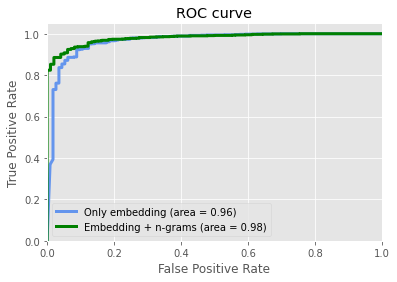

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

# we will compare the two classifiers by their roc curve.
# as we already saw from the eval report, the classifer *without* affin yielded 
# better score.
plt.style.use('ggplot')
plt.plot(ev1['roc_curve']['fpr'],
         ev1['roc_curve']['tpr'],
         color ='cornflowerblue',
         label='Only embedding (area = %0.2f)' %ev1['auc'], linewidth=3)
plt.plot(ev2['roc_curve']['fpr'],
         ev2['roc_curve']['tpr'],
         color='green',
         label='Embedding + n-grams (area = %0.2f)' %ev2['auc'],linewidth=3)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.title('ROC curve')
plt.show()